In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import time
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras import regularizers
from importlib import reload
from IPython.display import clear_output
from shapely.geometry import LineString, Point

sys.path.insert(0, os.path.join('..', 'rl'))
import arnold
import world
import sensor

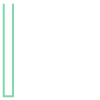

In [2]:
maze = LineString([[0,10], [0,0], [1,0], [1,10]])
goal = LineString([[0,10],[10,10]])
start_position = Point([.5,.5])
start_heading = np.pi/2
maze

In [3]:
reload(sensor)

sensors = []
min_dist, max_dist = 0.05, 2
sensors.append(sensor.Simple(0, min_dist, max_dist))
sensors.append(sensor.Simple(-np.pi/2, min_dist, max_dist))
sensors.append(sensor.Simple(np.pi, min_dist, max_dist))
sensors.append(sensor.Simple(np.pi/2, min_dist, max_dist))

In [4]:
reload(arnold)

terminator = arnold.Arnold()

In [286]:
reload(world)

env = world.Maze(terminator, sensors, start_position, start_heading, maze, goal)

In [289]:
# for k in range(220):
#     observation = env.step([1,1])
#     print(env.position.x, env.position.y, env.heading, observation)
#     time.sleep(0.05)

In [12]:
np.random.seed(123)
nb_actions = env.action_space.shape[0]

model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0